In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('train_cleaned.csv')
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [5]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,random_state=101,shuffle=False)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.5658331947629717

In [8]:
predict=lr.predict(test_x)
predict

array([2443.32513354, 2788.36657095, 2169.73477778, ..., 1530.66091668,
       1398.84548916, 1216.55011886])

In [9]:
lr.score(test_x,test_y)

0.5551582433748833

In [11]:
dt_t=pd.DataFrame({'Actual value':test_y,'Predicted value':predict,'Residual':test_y-predict})
dt_t

,Actual value,Predicted value,Residual
6392,4277.7650,2443.325134,1834.439866
6393,1070.6064,2788.366571,-1717.760171
6394,1001.3632,2169.734778,-1168.371578
6395,2871.5954,2385.333945,486.261455
6396,4287.7520,2716.588139,1571.163861
...,...,...,...
8518,2778.3834,3412.653143,-634.269743
8519,549.2850,1768.909050,-1219.624050
8520,1193.1136,1530.660917,-337.547317
8521,1845.5976,1398.845489,446.752111


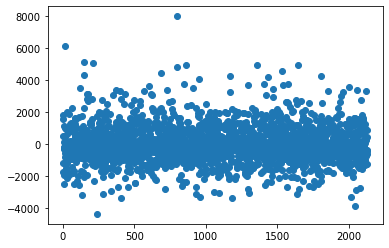

In [13]:
f=range(0,2131)
plt.scatter(f,dt_t['Residual'])

<BarContainer object of 45 artists>

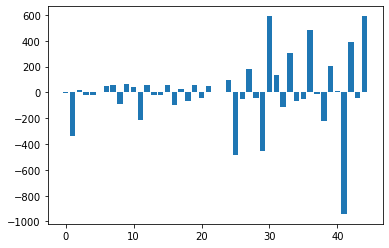

In [18]:
lenofcol=range(len(train_x.columns))
coef=lr.coef_
plt.bar(lenofcol,coef)

In [20]:
lr=LinearRegression(normalize=True)
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.5654078738434161

In [22]:
predict=lr.predict(test_x)
lr.score(test_x,test_y)

0.5553236335580596

<BarContainer object of 45 artists>

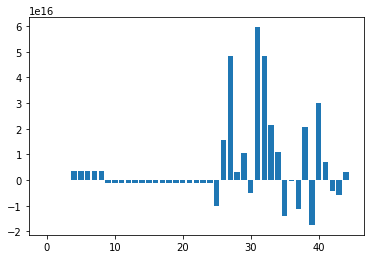

In [24]:
lenofcol=range(len(train_x.columns))
coef=lr.coef_
plt.bar(lenofcol,coef)

In [27]:
dt_t1=pd.DataFrame({'columns':train_x.columns,'coefficient':lr.coef_})
dt_t1

,columns,coefficient
0,Item_Weight,-2.108469e+00
1,Item_Visibility,-3.277187e+02
2,Item_MRP,1.567685e+01
3,Outlet_Establishment_Year,2.913699e+13
4,Item_Fat_Content_LF,3.480583e+15
5,Item_Fat_Content_Low Fat,3.480583e+15
6,Item_Fat_Content_Regular,3.480583e+15
7,Item_Fat_Content_low fat,3.480583e+15
8,Item_Fat_Content_reg,3.480583e+15
9,Item_Type_Baking Goods,-1.224018e+15


In [40]:
new=dt_t1[dt_t1['coefficient']>4]
new

,columns,coefficient
2,Item_MRP,1.567685e+01
3,Outlet_Establishment_Year,2.913699e+13
4,Item_Fat_Content_LF,3.480583e+15
5,Item_Fat_Content_Low Fat,3.480583e+15
6,Item_Fat_Content_Regular,3.480583e+15
7,Item_Fat_Content_low fat,3.480583e+15
8,Item_Fat_Content_reg,3.480583e+15
26,Outlet_Identifier_OUT013,1.558258e+16
27,Outlet_Identifier_OUT017,4.827978e+16
28,Outlet_Identifier_OUT018,3.096574e+15


In [41]:
df1=df[new['columns'].values]


In [42]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(df1,y)

In [44]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.5675701605146684

In [46]:
lr.score(test_x,test_y)

0.5486045882844786